In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import statistics as st
import os
import pickle
import glob
from scipy import stats
%matplotlib inline
import random
import matplotlib
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

In [13]:
gain = lambda Wb,R,NPE,e:Wb/(NPE*e*R)
NumofPE=lambda Wb,R,g,e:Wb/(R*g*e)

def PickleITDump(data,fileName):
    with open(fileName,'wb') as f:
        pickle.dump(data,f)
        
def PickleITRead(fileName):
    
    with open(fileName,'rb') as f:
        data=pickle.load(f)
    return data

def getValuesWithSource(files,weight):
    values={} 
    S1Values={"S1_PHOTOCATHODE":np.zeros(1000),"S2_PHOTOCATHODE":np.zeros(1000)}
    count=0
    for i in files:
        sources={}
    
        with open(i) as f:
            next(f)
            lines=f.readlines()
            for line in lines:
                splitline=line.split(",")
                if(splitline[0] in values.keys()):
                    if(splitline[1] in values[splitline[0]].keys()):
                        values[splitline[0]][splitline[1]]=np.append(values[splitline[0]][splitline[1]],round(int(splitline[2])/weight))
                    else:
                        sources[splitline[1]]=np.array(round(int(splitline[2])/weight))
                        values[splitline[0]][splitline[1]]=sources[splitline[1]]
                else:
                    sources={}
                    sources[splitline[1]]=np.array(round(int(splitline[2])/weight))
                    values[splitline[0]]=sources
                
                if(splitline[0] in S1Values.keys()):
                    S1Values[splitline[0]][count]=S1Values[splitline[0]][count]+int(splitline[2])/weight
                    
                    
        f.close()
        count=count+1
        
    return values,S1Values
### Photons

## point Source
Point_SolidAngle=lambda r,R:(r**2/(4*R**2))

## Disk Source
Disk_SolidAngle=lambda A,B:(B**2/4)*(1-3/4*(A**2+B**2)+15/8*(1/3*(A**4+B**4)+(A*B)**2)-35/16*(1/4*(A**6+B**6)+3/2*(A*B)**2*(A**2+B**2)))

def getAll(Path):
    Files = glob.glob(Path,recursive=True)
    Values=getValuesWithSource(Files,1)
    return Values
    
def SmearIT(mean,percent):
    return np.random.normal(mean,mean*percent)


In [14]:
### Gains ###
IlkersGains=[3.9e6,2.6e6]
NicksGains=[3.4e6,2.2e6]

In [15]:
## Obtain the Data
Area=PickleITRead("S1Area.p")

## Obtain Sim Data
SimData=PickleITRead("S1Sim.p")


In [16]:
##### Needle Only
#S1_NeedleOnlyPath="/media/ilker/Ilker/SimResults/Oct_20_2022/S1/counts/Photon_*.txt"
#S1_NeedleOnlyFiles = glob.glob(S1_NeedleOnlyPath,recursive=True)
#S1_NeedleOnly=getValuesWithSource(S1_NeedleOnlyFiles,1)




#S1_NeedleOnlyInfoPath="/media/ilker/Ilker/SimResults/Oct_20_2022/S1/counts/counts_1000/Extra_*.txt"
#S1_infoNeedleOnlyFiles = glob.glob(S1_NeedleOnlyInfoPath,recursive=True)
#S1_info_NeedleOnly=getValuesWithSource(S1_infoNeedleOnlyFiles,1)


### With Needle + Collimator
#S2_NeedleCollimPath="/media/ilker/Ilker/SimResults/Sep_28_2022/Collimator/counts/Photon_*.txt"
#S2_NeedleCollimFiles = glob.glob(S2_NeedleCollimPath,recursive=True)
#S2_NeedleCollim=getValuesWithSource(S2_NeedleCollimFiles,1)


#S2_NeedleCollimInfoPath="/media/ilker/Ilker/SimResults/Sep_28_2022/Collimator/counts/Extra_*.txt"
#S2_NeedleCollimInfoFiles = glob.glob(S2_NeedleCollimInfoPath,recursive=True)
#S2_info_NeedleCollim=getValuesWithSource(S2_NeedleCollimInfoFiles,1)

In [17]:
'''values={"Needle":S1_NeedleOnly,
        "NeedleInfo":S1_info_NeedleOnly}
PickleITDump(values,"S1Sim.p")'''

'values={"Needle":S1_NeedleOnly,\n        "NeedleInfo":S1_info_NeedleOnly}\nPickleITDump(values,"S1Sim.p")'

In [18]:
### PMT Gains Ilker
Day1_PMT1_GainIL=NumofPE(Area["Day1_Ch1Area_PMT1"][0],50,IlkersGains[0],1.62e-19)
Day1_PMT3_GainIL=NumofPE(Area["Day1_Ch2Area_PMT3"][0],50,IlkersGains[1],1.62e-19)
Day2_PMT1_GainIL=NumofPE(Area["Day2_Ch1Area_PMT1"][0],50,IlkersGains[0],1.62e-19)
Day2_PMT3_GainIL=NumofPE(Area["Day2_Ch2Area_PMT3"][0],50,IlkersGains[1],1.62e-19)

### PMT Gains Nick
Day1_PMT1_GainNk=NumofPE(Area["Day1_Ch1Area_PMT1"][0],50,NicksGains[0],1.62e-19)
Day1_PMT3_GainNk=NumofPE(Area["Day1_Ch2Area_PMT3"][0],50,NicksGains[1],1.62e-19)
Day2_PMT1_GainNk=NumofPE(Area["Day2_Ch1Area_PMT1"][0],50,NicksGains[0],1.62e-19)
Day2_PMT3_GainNk=NumofPE(Area["Day2_Ch2Area_PMT3"][0],50,NicksGains[1],1.62e-19)

binss=np.arange(0,1000,2)

plt.title("Needle Only PMT1 Day1")

#plt.hist(SimData["Needle"]["S1_PHOTOCATHODE"]["Po210"],bins=binss ,density=True,stacked=True,label="Po210",alpha=0.3)
#plt.hist(SimData["Needle"]["S1_PHOTOCATHODE"]["Bi210"],bins=binss ,density=True,stacked=True,label="Bi210",alpha=0.3)
plt.hist(Po210_SmearedPMT1,bins=binss,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
plt.hist(Bi210_SmearedPMT1,bins=binss,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)


#plt.hist(Day1_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day1_PMT1_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)


#plt.hist(Day2_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day2_PMT1_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)

plt.legend()
plt.show()




binss=np.arange(0,2000,100)

plt.title("Needle Only PMT3 Day1")


plt.hist(Po210_SmearedPMT3,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
plt.hist(Bi210_SmearedPMT3,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)


#plt.hist(Day1_PMT3_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day1_PMT1_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)


#plt.hist(Day2_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)
#plt.hist(Day2_PMT1_GainIL,bins=binss,density=True,stacked=True,label="LED Gain  Method 2(Ilker)",color="b",alpha=0.3)

plt.legend()
plt.show()


In [19]:
#plt.figure(figsize=(12,8),dpi=300)
#plt.title("Delta Function")

#h=plt.hist(Delta,bins=20 ,density=True,stacked=True,label="Delta",alpha=0.3)
#hsmeared=plt.hist(DeltaSmeared,bins=20 ,density=True,stacked=True,label="DeltaSmeared",alpha=0.3)

binss=np.arange(0,3000,100)
plt.figure(figsize=(12,8),dpi=300)
plt.title("Needle Only PMT3 Day2")
plt.ylabel("Number of Events")
plt.xlabel("PE")
plt.hist(Po210_SmearedPMT3,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)

plt.hist(Bi210_SmearedPMT3,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)
#plt.hist(Day2_PMT3_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)

#plt.hist(Po210_SmearedPMT3*0.30,bins=binss ,density=True,stacked=True,label="Adjusted Po210",alpha=0.3)
#plt.hist(Bi210_SmearedPMT3*0.30,bins=binss ,density=True,stacked=True,label="Adjusted Bi210",alpha=0.3)
plt.legend()
plt.show()


binss=np.arange(0,15000,400)
plt.figure(figsize=(12,8),dpi=300)
plt.title("Needle with PMT1 Day2")
plt.ylabel("Number of Events")
plt.xlabel("PE")
#plt.hist(Po210_Smeared,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
#plt.hist(Bi210_Smeared,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)
plt.hist(Po210_SmearedPMT1,bins=binss ,density=True,stacked=True,label="Po210_Smeared",alpha=0.3)
plt.hist(Bi210_SmearedPMT1,bins=binss ,density=True,stacked=True,label="Bi210_Smeared",alpha=0.3)
#plt.hist(Day2_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1(Nick)",color="r",alpha=0.3)

plt.legend()
plt.show()

In [20]:
path="/media/ilker/Ilker/SimResults/"
E1000ms=getAll(path+"Oct_20_2022/S1/counts/Extra_*.txt")
#E40us=getAll("/media/ilker/Ilker/SimResults/Oct_5_2022/40us/counts/Extra_*.txt")
#E150us=getAll("/media/ilker/Ilker/SimResults/Oct_5_2022/150us/counts/Extra_*.txt")
#E100us=getAll("/media/ilker/Ilker/SimResults/Oct_5_2022/100us/counts/Extra_*.txt")



In [52]:
S1PMT1=np.mean(E1000ms[0]["S1_PHOTOCATHODE"]["Bi210"]*0.2)+np.mean(E1000ms[0]["S1_PHOTOCATHODE"]["Po210"]*0.2)+np.mean(E1000ms[0]["S1_PHOTOCATHODE"]["Pb210"]*0.2)+np.mean(E1000ms[0]["S1_PHOTOCATHODE"]["Bi210[46.539]"]*0.2)
S1PMT1_std=np.sqrt(np.std(E1000ms[0]["S1_PHOTOCATHODE"]["Bi210"]*0.2)**2+np.std(E1000ms[0]["S1_PHOTOCATHODE"]["Po210"]*0.2)**2+np.std(E1000ms[0]["S1_PHOTOCATHODE"]["Pb210"]*0.2)**2+np.std(E1000ms[0]["S1_PHOTOCATHODE"]["Bi210[46.539]"]*0.2)**2)
S1PMT3=np.mean(E1000ms[0]["S2_PHOTOCATHODE"]["Bi210"]*0.2)+np.mean(E1000ms[0]["S2_PHOTOCATHODE"]["Po210"]*0.2)+np.mean(E1000ms[0]["S2_PHOTOCATHODE"]["Pb210"]*0.2)+np.mean(E1000ms[0]["S2_PHOTOCATHODE"]["Bi210[46.539]"]*0.2)
S1PMT3_std=np.sqrt(np.std(E1000ms[0]["S2_PHOTOCATHODE"]["Bi210"]*0.2)**2+np.std(E1000ms[0]["S2_PHOTOCATHODE"]["Po210"]*0.2)**2+np.std(E1000ms[0]["S2_PHOTOCATHODE"]["Pb210"]*0.2)**2+np.std(E1000ms[0]["S2_PHOTOCATHODE"]["Bi210[46.539]"]*0.2)**2)
print(S1PMT3)
print(S1PMT3_std)

2.2344617670829314
0.7378535012276922


In [21]:


PMT1=SmearIT(E1000ms[0]["S1_PHOTOCATHODE"]*0.2,0.05)
PMT3=SmearIT(E1000ms[0]["S2_PHOTOCATHODE"]*0.2,0.05)



DetE1000ms=getAll("/media/ilker/Ilker/SimResults/Oct_5_2022/1000_events/counts/Photon_*.txt")
DetE40us=getAll("/media/ilker/Ilker/SimResults/Oct_5_2022/40us/counts/Photon_*.txt")
DetE150us=getAll("/media/ilker/Ilker/SimResults/Oct_5_2022/150us/counts/Photon_*.txt")
DetE100us=getAll("/media/ilker/Ilker/SimResults/Oct_5_2022/100us/counts/Photon_*.txt")

In [24]:
print(E1000ms[0])

{'S1_PHOTOCATHODE': {'Bi210': array([2, 2, 3, 1, 2, 1, 4, 2, 1, 1, 1, 6, 2, 1, 4, 3, 4, 9, 1, 1, 5, 3,
       1, 2, 2, 3, 3, 2, 1, 1, 2, 3, 1, 1, 1, 6, 2, 2, 2, 2, 3, 2, 1, 2,
       1, 2, 1, 3, 6, 2, 3, 3, 8, 1, 7, 2, 2, 1, 1, 4, 2, 3, 1, 2, 4, 1,
       5, 1, 3, 2, 3, 1, 2, 1, 2, 4, 1, 2, 2, 1, 5, 1, 2, 3, 2, 4, 1, 3,
       1, 4, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 3, 4, 1, 1, 2, 1, 2, 1, 6, 1,
       1, 1, 3, 4, 1, 2, 3, 1, 1, 2, 5, 2, 1, 5, 1, 2, 3, 1, 1, 2, 1, 6,
       2, 2, 2, 2, 2, 1, 1, 3, 5, 3, 4, 1, 4, 2, 1, 1, 2, 1, 3, 1, 1, 1,
       4, 1, 5, 1, 2, 5, 1, 1, 2, 2, 1, 1, 1, 4, 2, 1, 1, 2, 1, 1, 2, 3,
       1, 1, 2, 2, 2, 1, 3, 1, 3, 5, 1, 2, 3, 6, 2, 5, 3, 3, 3, 4, 1, 2,
       1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 4, 2, 1, 1, 4, 1, 2, 1, 5, 2, 4, 1,
       1, 1, 1, 2, 4, 1, 1, 3, 2, 1, 2, 4, 1, 2, 3, 2, 1, 1, 1, 1, 1, 4,
       1, 1, 2, 1, 5, 1, 1, 1, 2, 1, 2, 2, 4, 3, 1, 2, 5, 4, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 3, 1, 1, 1, 3, 4, 2, 2, 2, 3, 3, 2, 5, 1, 5, 1, 7,
       3, 3, 1, 2, 2,

In [26]:
##### 
###
#PMT3Efficiency=np.mean(Oct6Events["S2_PHOTOCATHODE"]["Po210"])/np.mean(Oct6Events["All_p"]["Po210"])
#PMT1Efficiency=np.mean(Oct6Events["S1_PHOTOCATHODE"]["Po210"])/np.mean(Oct6Events["All_p"]["Po210"])

SolidAnglePMT1=SmearIT(E1000ms[0]["Total_Produced_Photons"]["None"]*Point_SolidAngle(0.5,13)*0.2,0.05)
SolidAnglePMT3=SmearIT(E1000ms[0]["Total_Produced_Photons"]["None"]*Point_SolidAngle(0.5,36)*0.2,0.05)
#SolidAnglePMT1=E1000ms[0]["All_p"]["Po210"]*Point_SolidAngle(0.5,13)*0.2
#SolidAnglePMT3=E1000ms[0]["All_p"]["Po210"]*Point_SolidAngle(0.5,36)*0.2

#print(f"---- Simulation Alpha Photon Efficiency ----")
#print(f"PMT1 efficiency is {PMT1Efficiency}")
#print(f"PMT3 efficiency is {PMT3Efficiency} \n")

print(f"---- Solid Angle Alpha Photon Efficiency ----")
print(f"PMT1 is {np.mean(SolidAnglePMT1)}")
print(f"PMT3 is {np.mean(SolidAnglePMT3)}")

#print(f"---- Solid Angle Alpha Photon Efficiency ----")
#print(f"PMT1 is {(PMT1Efficiency-SolidAnglePMT1)/SolidAnglePMT1}")
#print(f"PMT3 is {(PMT3Efficiency-SolidAnglePMT3)/SolidAnglePMT3}")


---- Solid Angle Alpha Photon Efficiency ----
PMT1 is 5.319679973483377
PMT3 is 0.697120056214346


FileNotFoundError: [Errno 2] No such file or directory: '/home/ilker/Desktop/CRAB_Pictures/PMT3_S1_Light_Yield.jpeg'

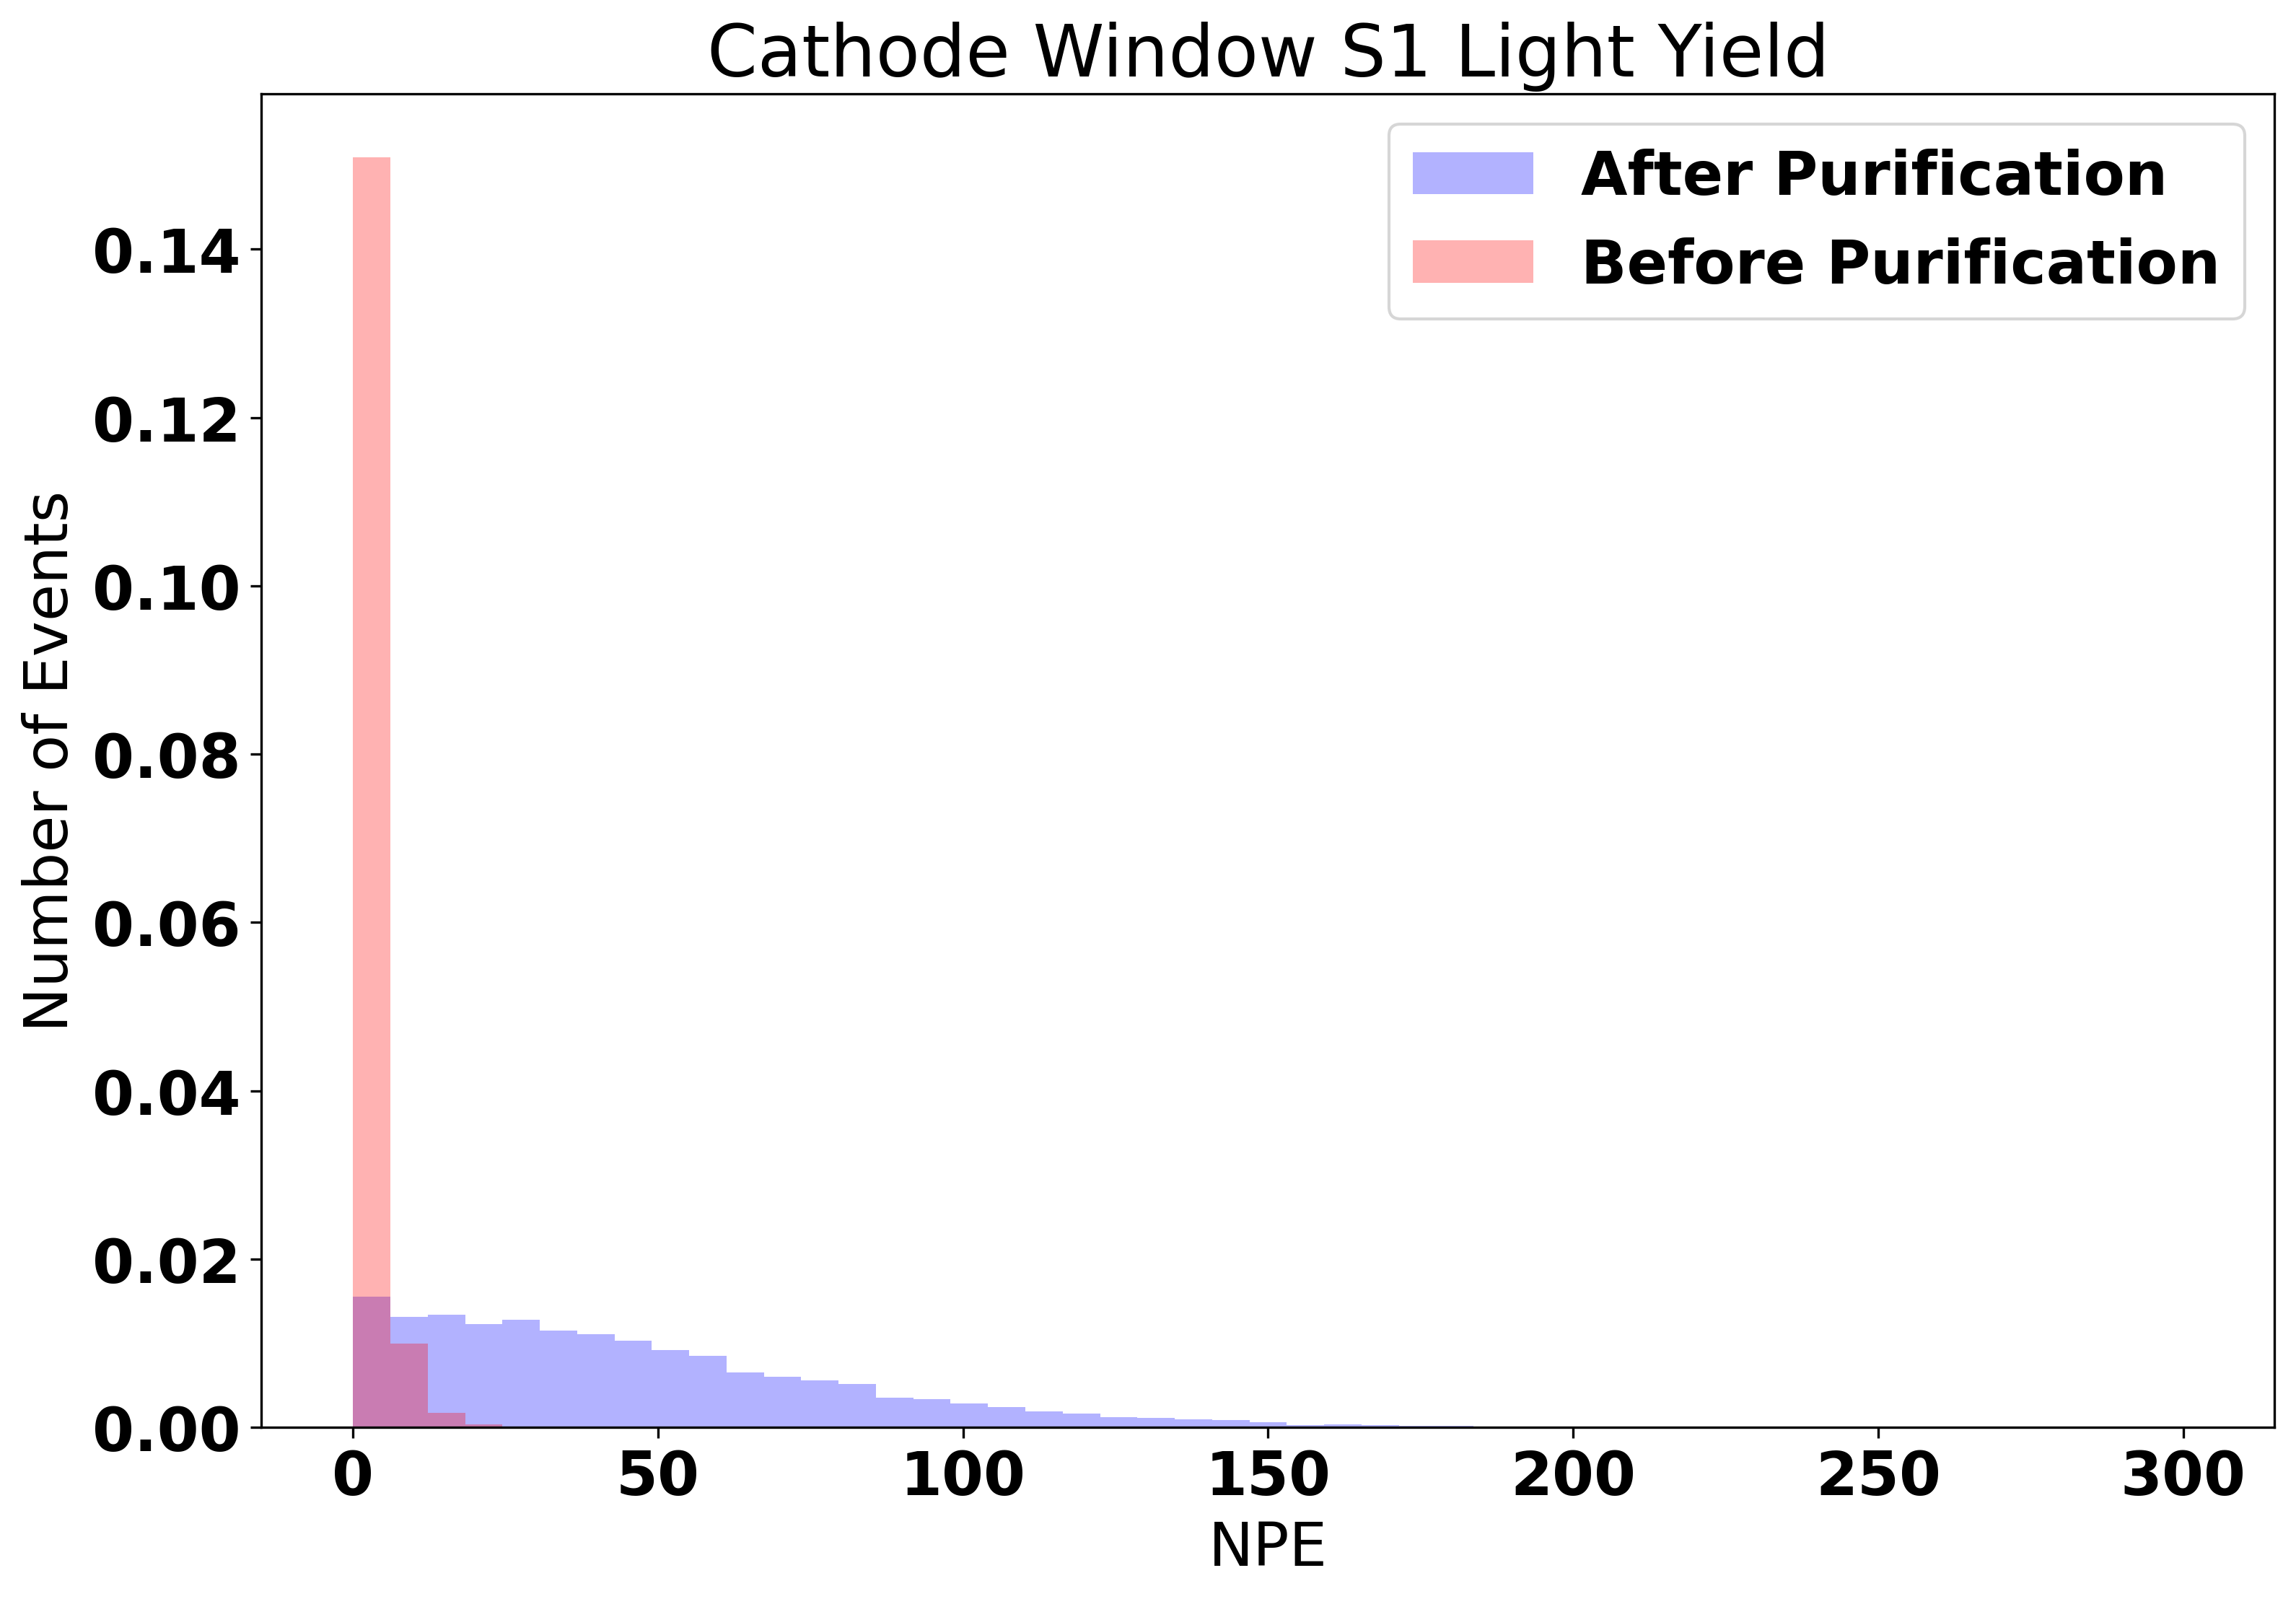

In [27]:
### Data Comp. Day2

binss=np.linspace(0,300,50)
plt.figure(figsize=(12,8),dpi=300)
plt.title("Cathode Window S1 Light Yield")
plt.ylabel("Number of Events")
plt.xlabel("NPE")

#plt.hist(Day2_PMT3_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1 (Fitting)",color="r",alpha=0.3)
plt.hist(Day2_PMT3_GainIL,bins=binss,density=True,stacked=True,label="After Purification",color="b",alpha=0.3)
plt.hist(Day1_PMT3_GainIL,bins=binss,density=True,stacked=True,label="Before Purification",color="r",alpha=0.3)


plt.legend()
plt.savefig("/home/ilker/Desktop/CRAB_Pictures/PMT3_S1_Light_Yield.jpeg")

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ilker/Desktop/CRAB_Pictures/PMT1_S1_Light_Yield.jpeg'

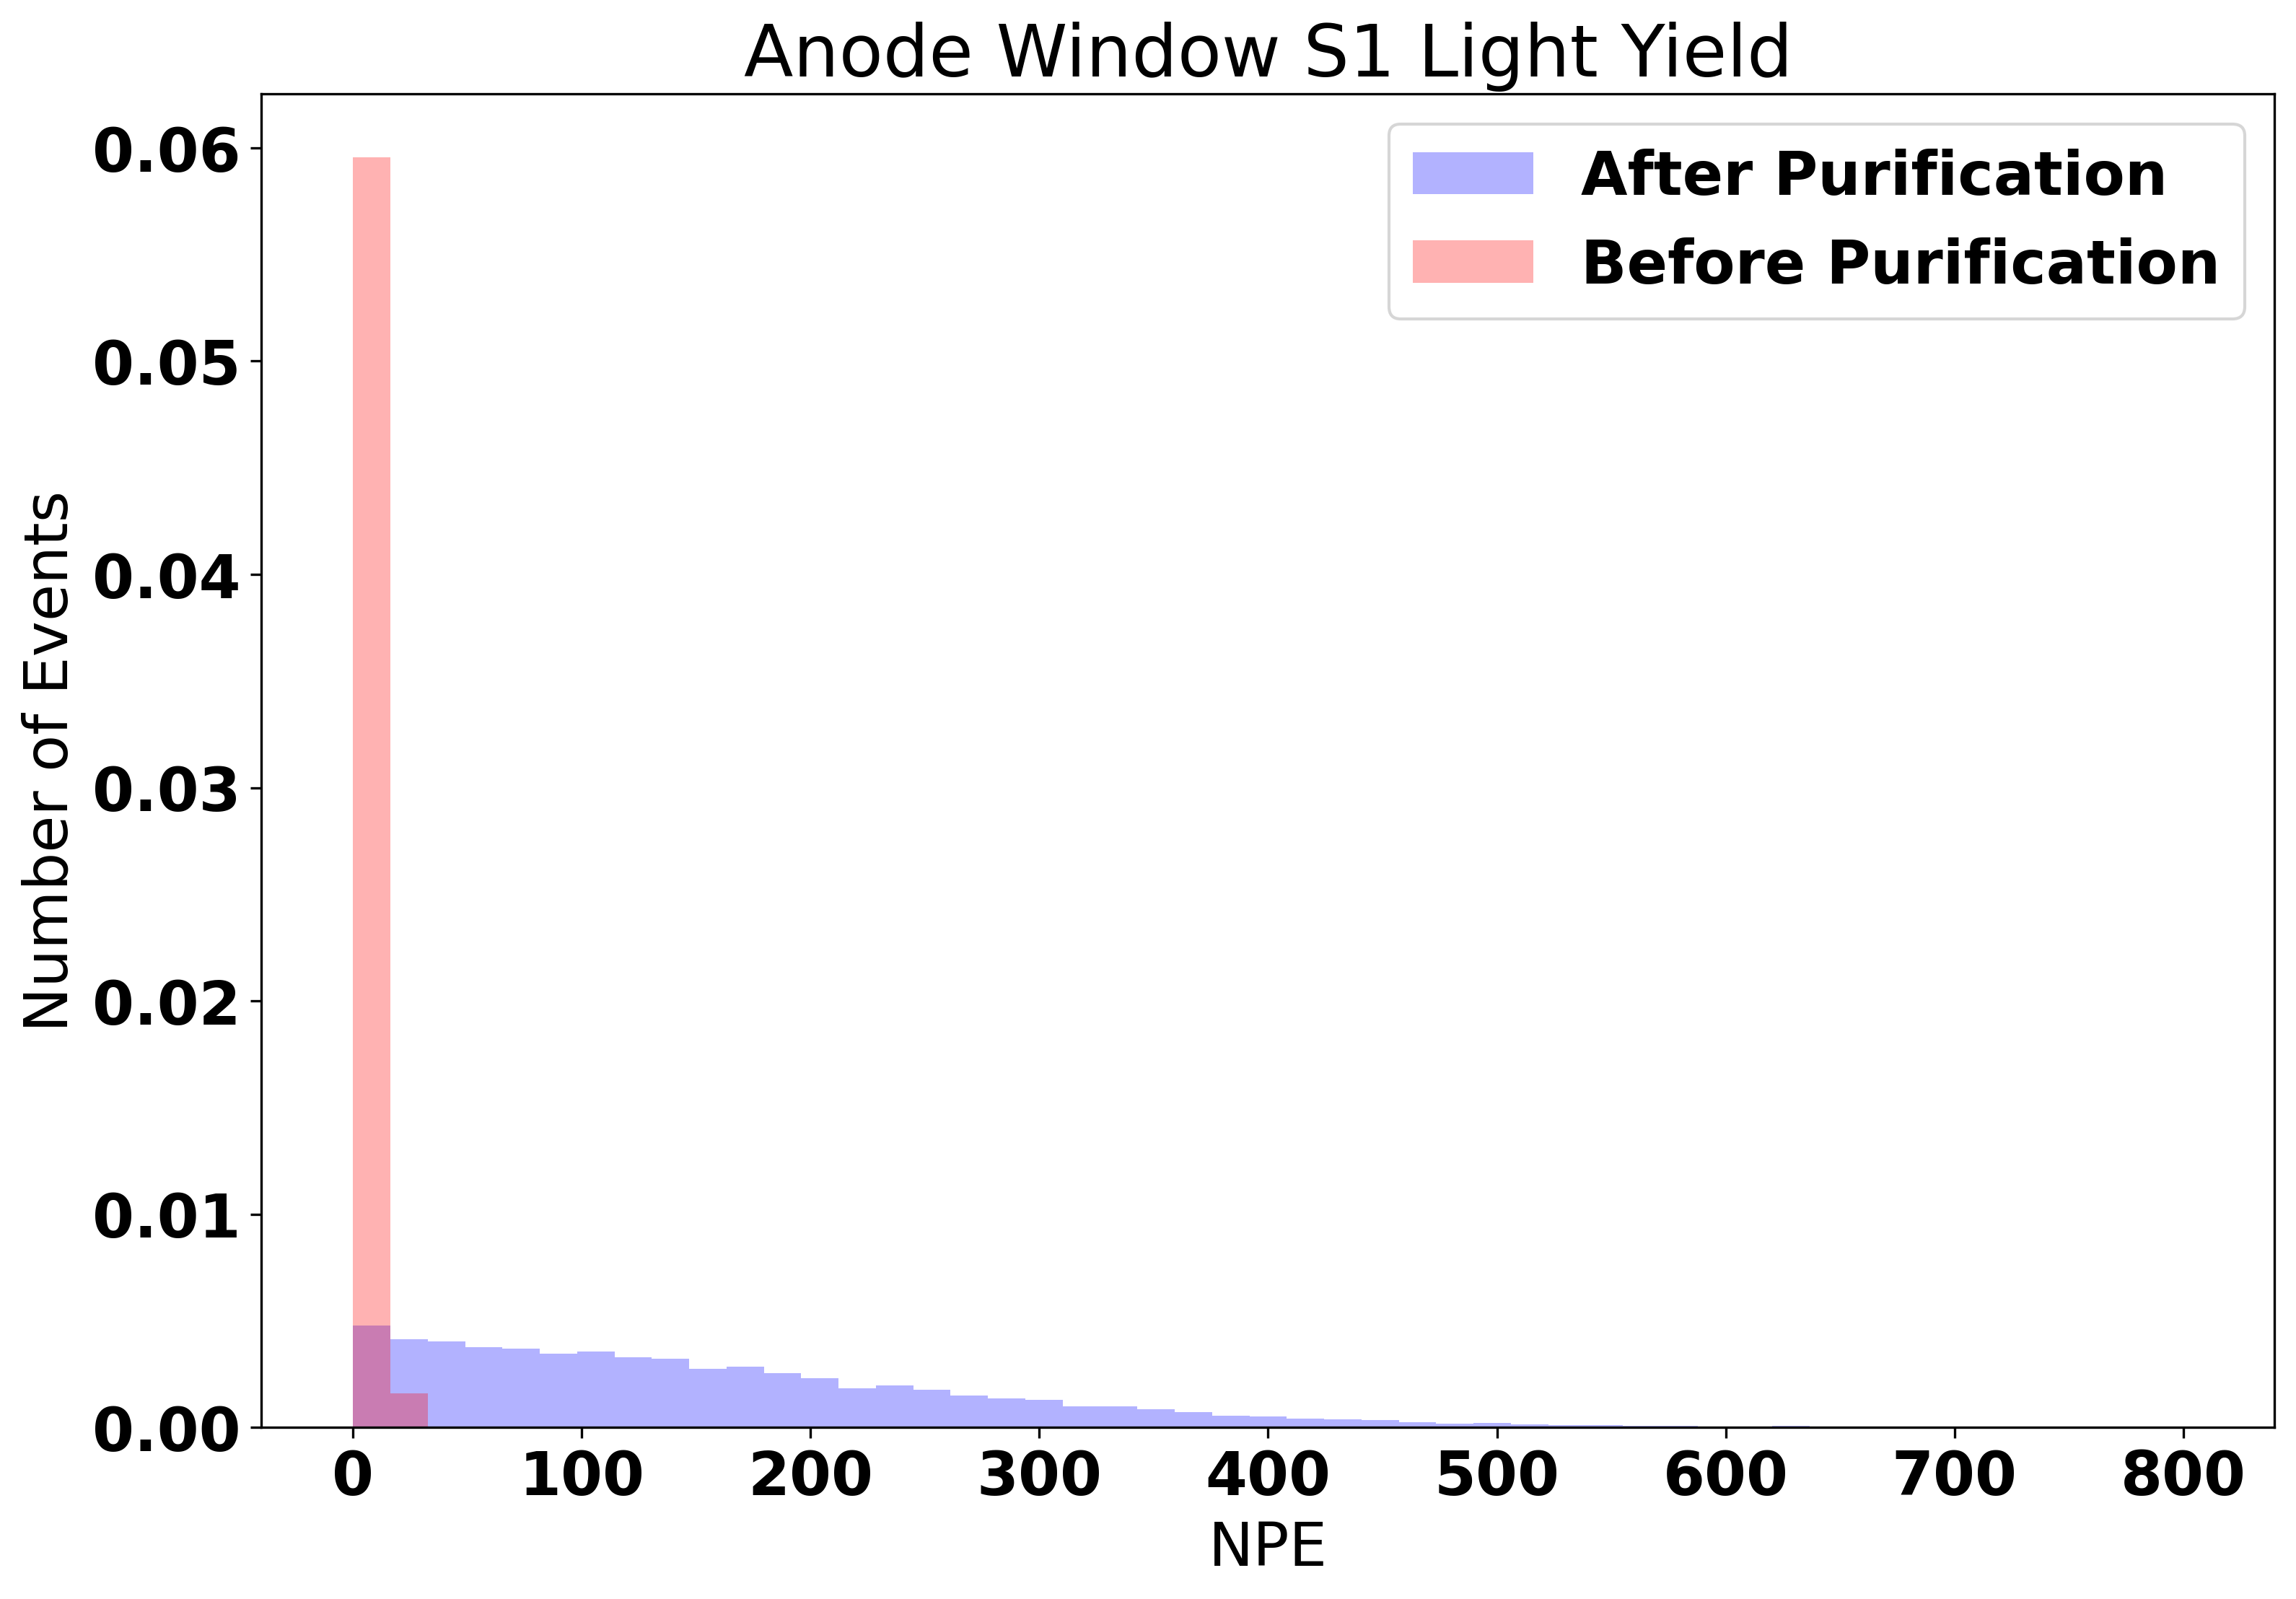

In [28]:
### Data Comp. Day2


binss=np.linspace(0,800,50)
plt.figure(figsize=(12,8),dpi=300)
plt.title("Anode Window S1 Light Yield")
plt.ylabel("Number of Events")
plt.xlabel("NPE")

#plt.hist(Day2_PMT1_GainNk,bins=binss,density=True,stacked=True,label="LED Gain Method 1 (Fitting)",color="r",alpha=0.3)
plt.hist(Day2_PMT1_GainIL,bins=binss,density=True,stacked=True,label="After Purification",color="b",alpha=0.3)
plt.hist(Day1_PMT1_GainIL,bins=binss,density=True,stacked=True,label="Before Purification",color="r",alpha=0.3)
#plt.hist(SmearIT(E1000ms["S1_PHOTOCATHODE"]*0.18,0.25),bins=binss ,density=True,stacked=True,label="GEANT4",alpha=0.3)
#plt.hist(SmearIT(E1000ms["S1_PHOTOCATHODE"]["Bi210"]*0.18,0.14),bins=binss ,density=True,stacked=True,label="(GEANT4)",alpha=0.3)
#plt.hist(SmearIT(DetE1000ms["S1_PHOTOCATHODE"]["Po210"],0.14),bins=binss ,density=True,stacked=True,label="Po210_150us",alpha=0.3)
#plt.hist(SmearIT(DetE1000ms["S1_PHOTOCATHODE"]["Bi210"],0.14),bins=binss ,density=True,stacked=True,label="Bi210",alpha=0.3)


plt.legend()
plt.savefig("/home/ilker/Desktop/CRAB_Pictures/PMT1_S1_Light_Yield.jpeg")

plt.show()

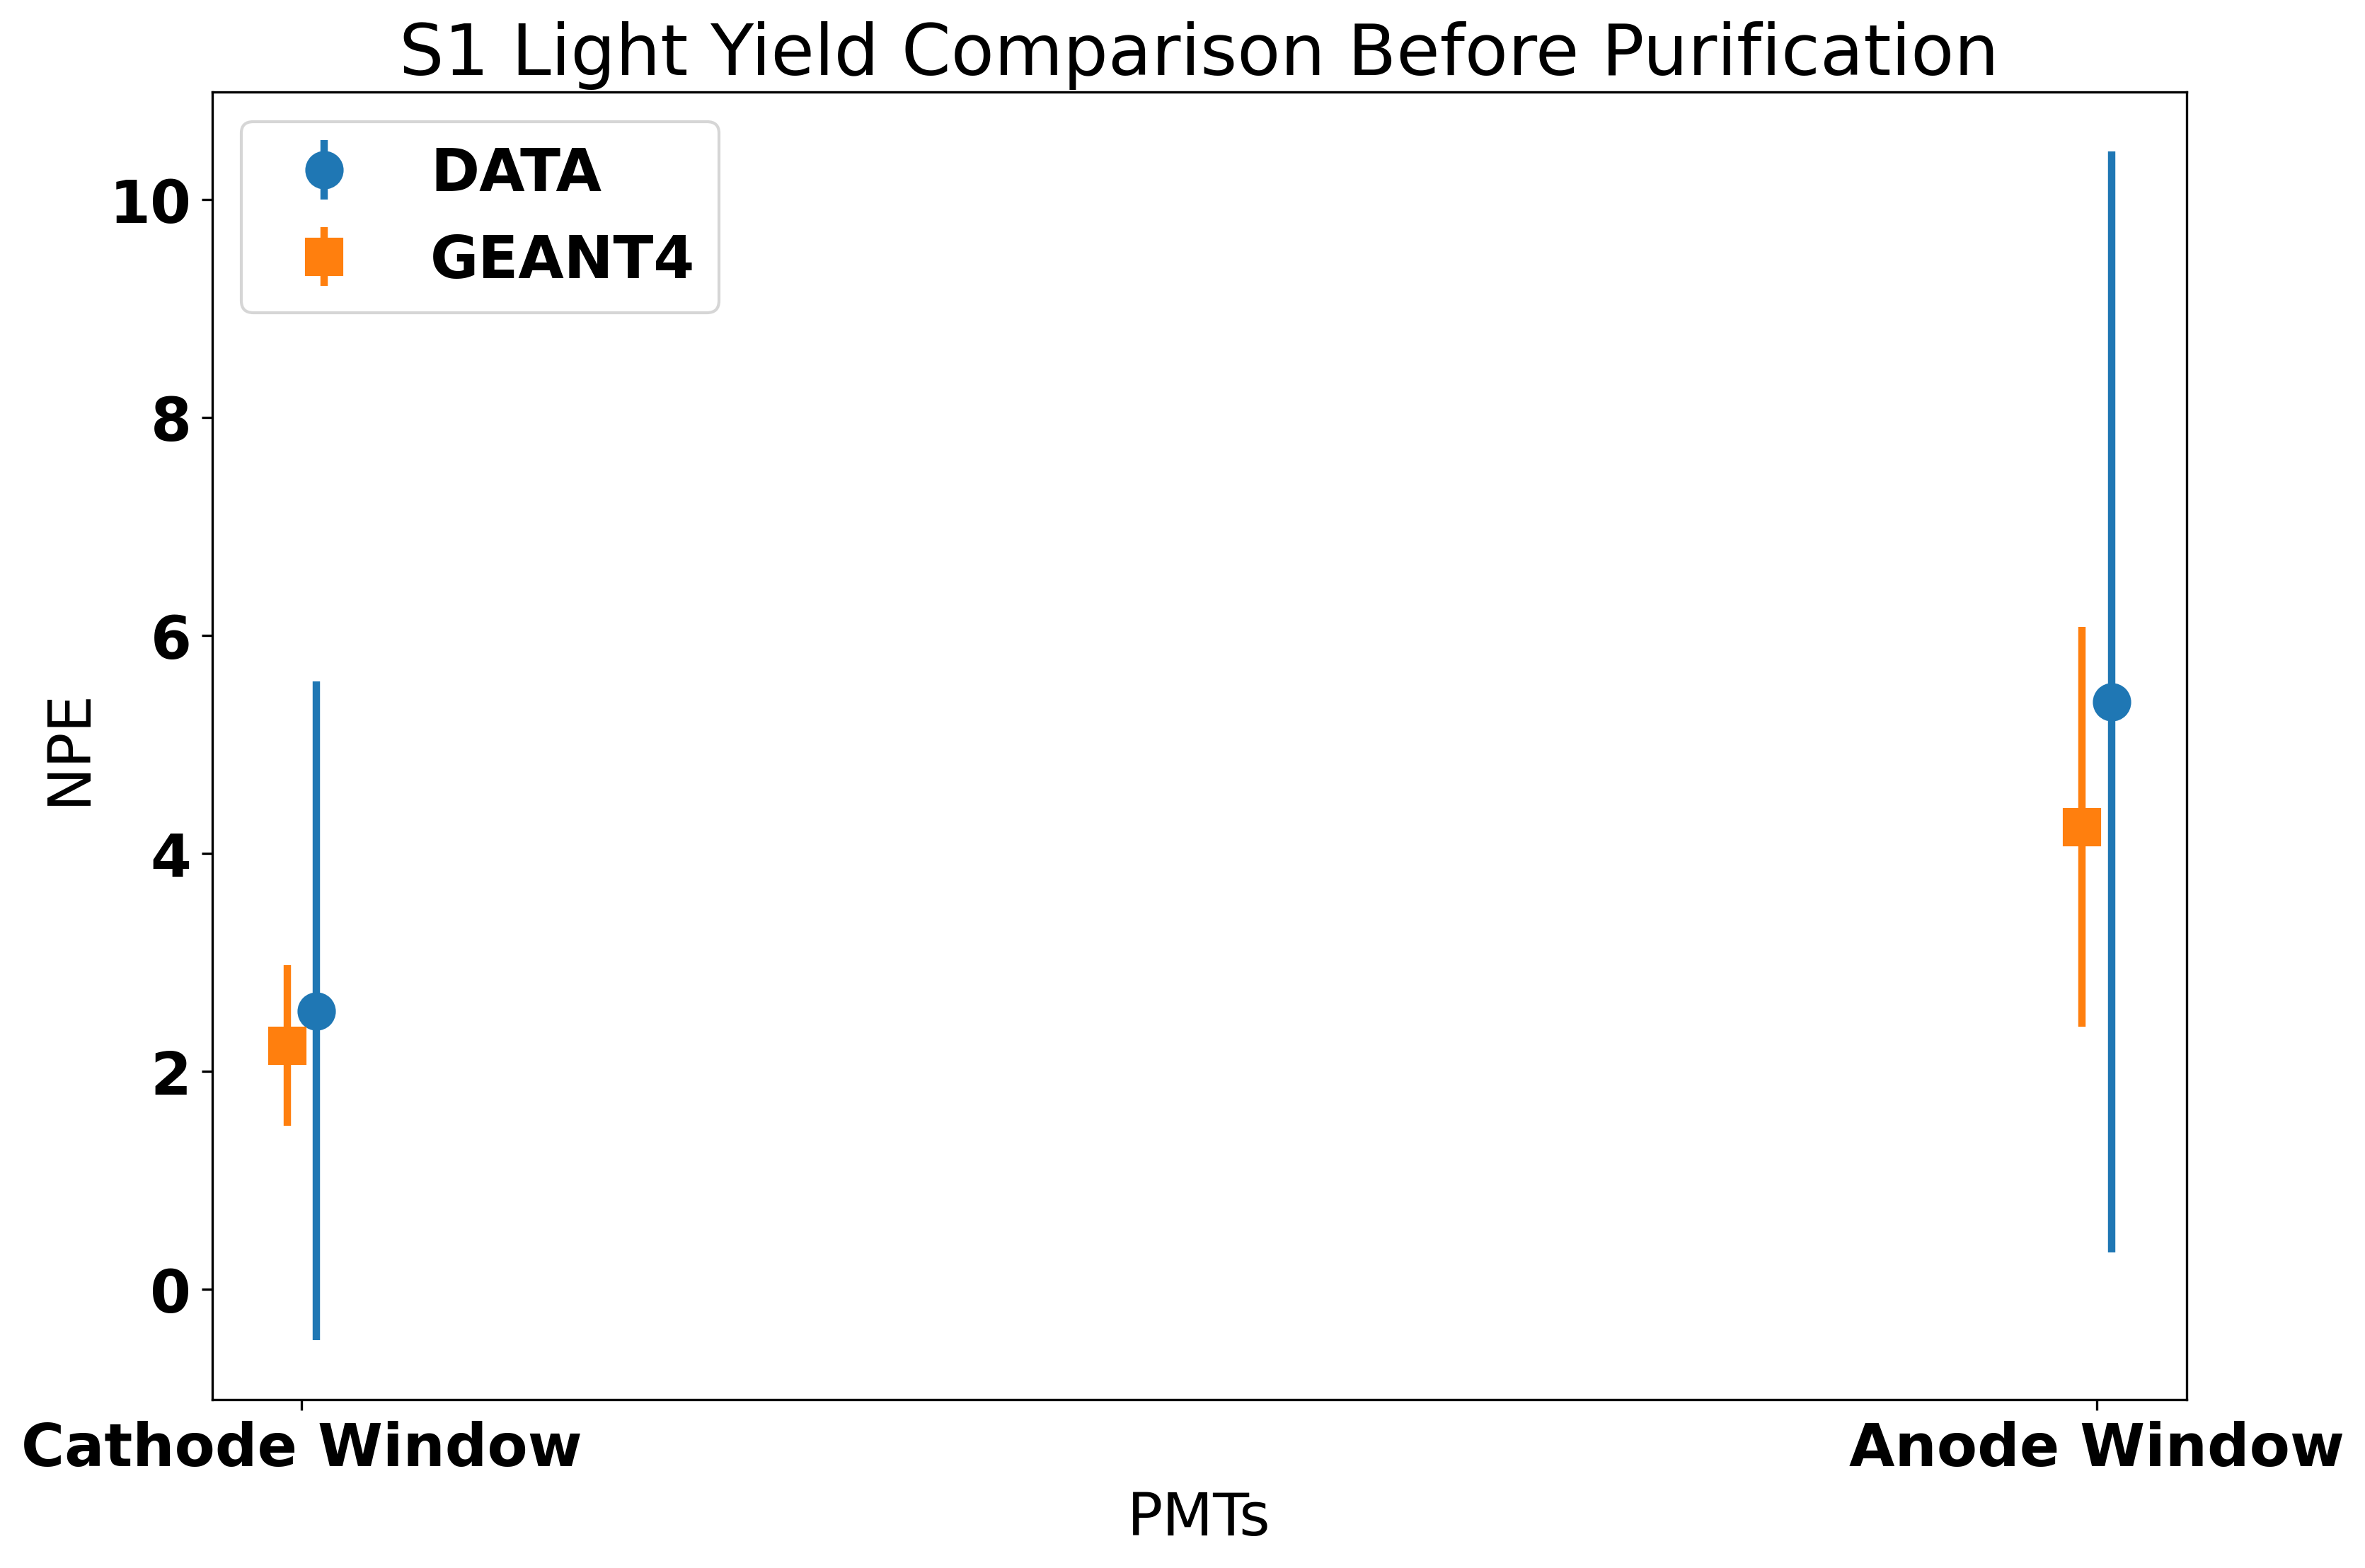

In [62]:
###

#### This scatter plot compares cathode and anode signals ###
x=["Cathode Window","Anode Window"]

fig=plt.figure(figsize=(12,8),dpi=300)

plt.title("S1 Light Yield Comparison Before Purification")
plt.ylabel("NPE")
plt.xlabel("PMTs")


offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

## Data
ydata=[np.mean(Day1_PMT3_GainIL),np.mean(Day1_PMT1_GainIL)]
ydataerr=[np.std(Day1_PMT3_GainIL),np.std(Day1_PMT1_GainIL)]
plt.errorbar(x,ydata,ydataerr,fmt='o',label="DATA",transform=trans+offset(+5),markersize=12,elinewidth=2.5)

## Sim
ysim=[S1PMT3,S1PMT1]
ysimerr=[S1PMT3_std,S1PMT1_std]
plt.errorbar(x,ysim,ysimerr,fmt='s',alpha=1,label="GEANT4",transform=trans+offset(-5),markersize=12,elinewidth=2.5)

## SolidAngle sim
ysolid=[np.mean(SolidAnglePMT3),np.mean(SolidAnglePMT1)]
ysoliderr=[np.std(SolidAnglePMT3),np.std(SolidAnglePMT1)]

#plt.errorbar(x,ysolid,ysoliderr,fmt='v',alpha=0.5,label="Solid Angle",transform=trans+offset(+15))
plt.legend(loc='upper left')
plt.savefig("/media/ilker/Ilker/CRAB/Pictures/S1_Scatter_BeforePurifcation.png")
plt.show()


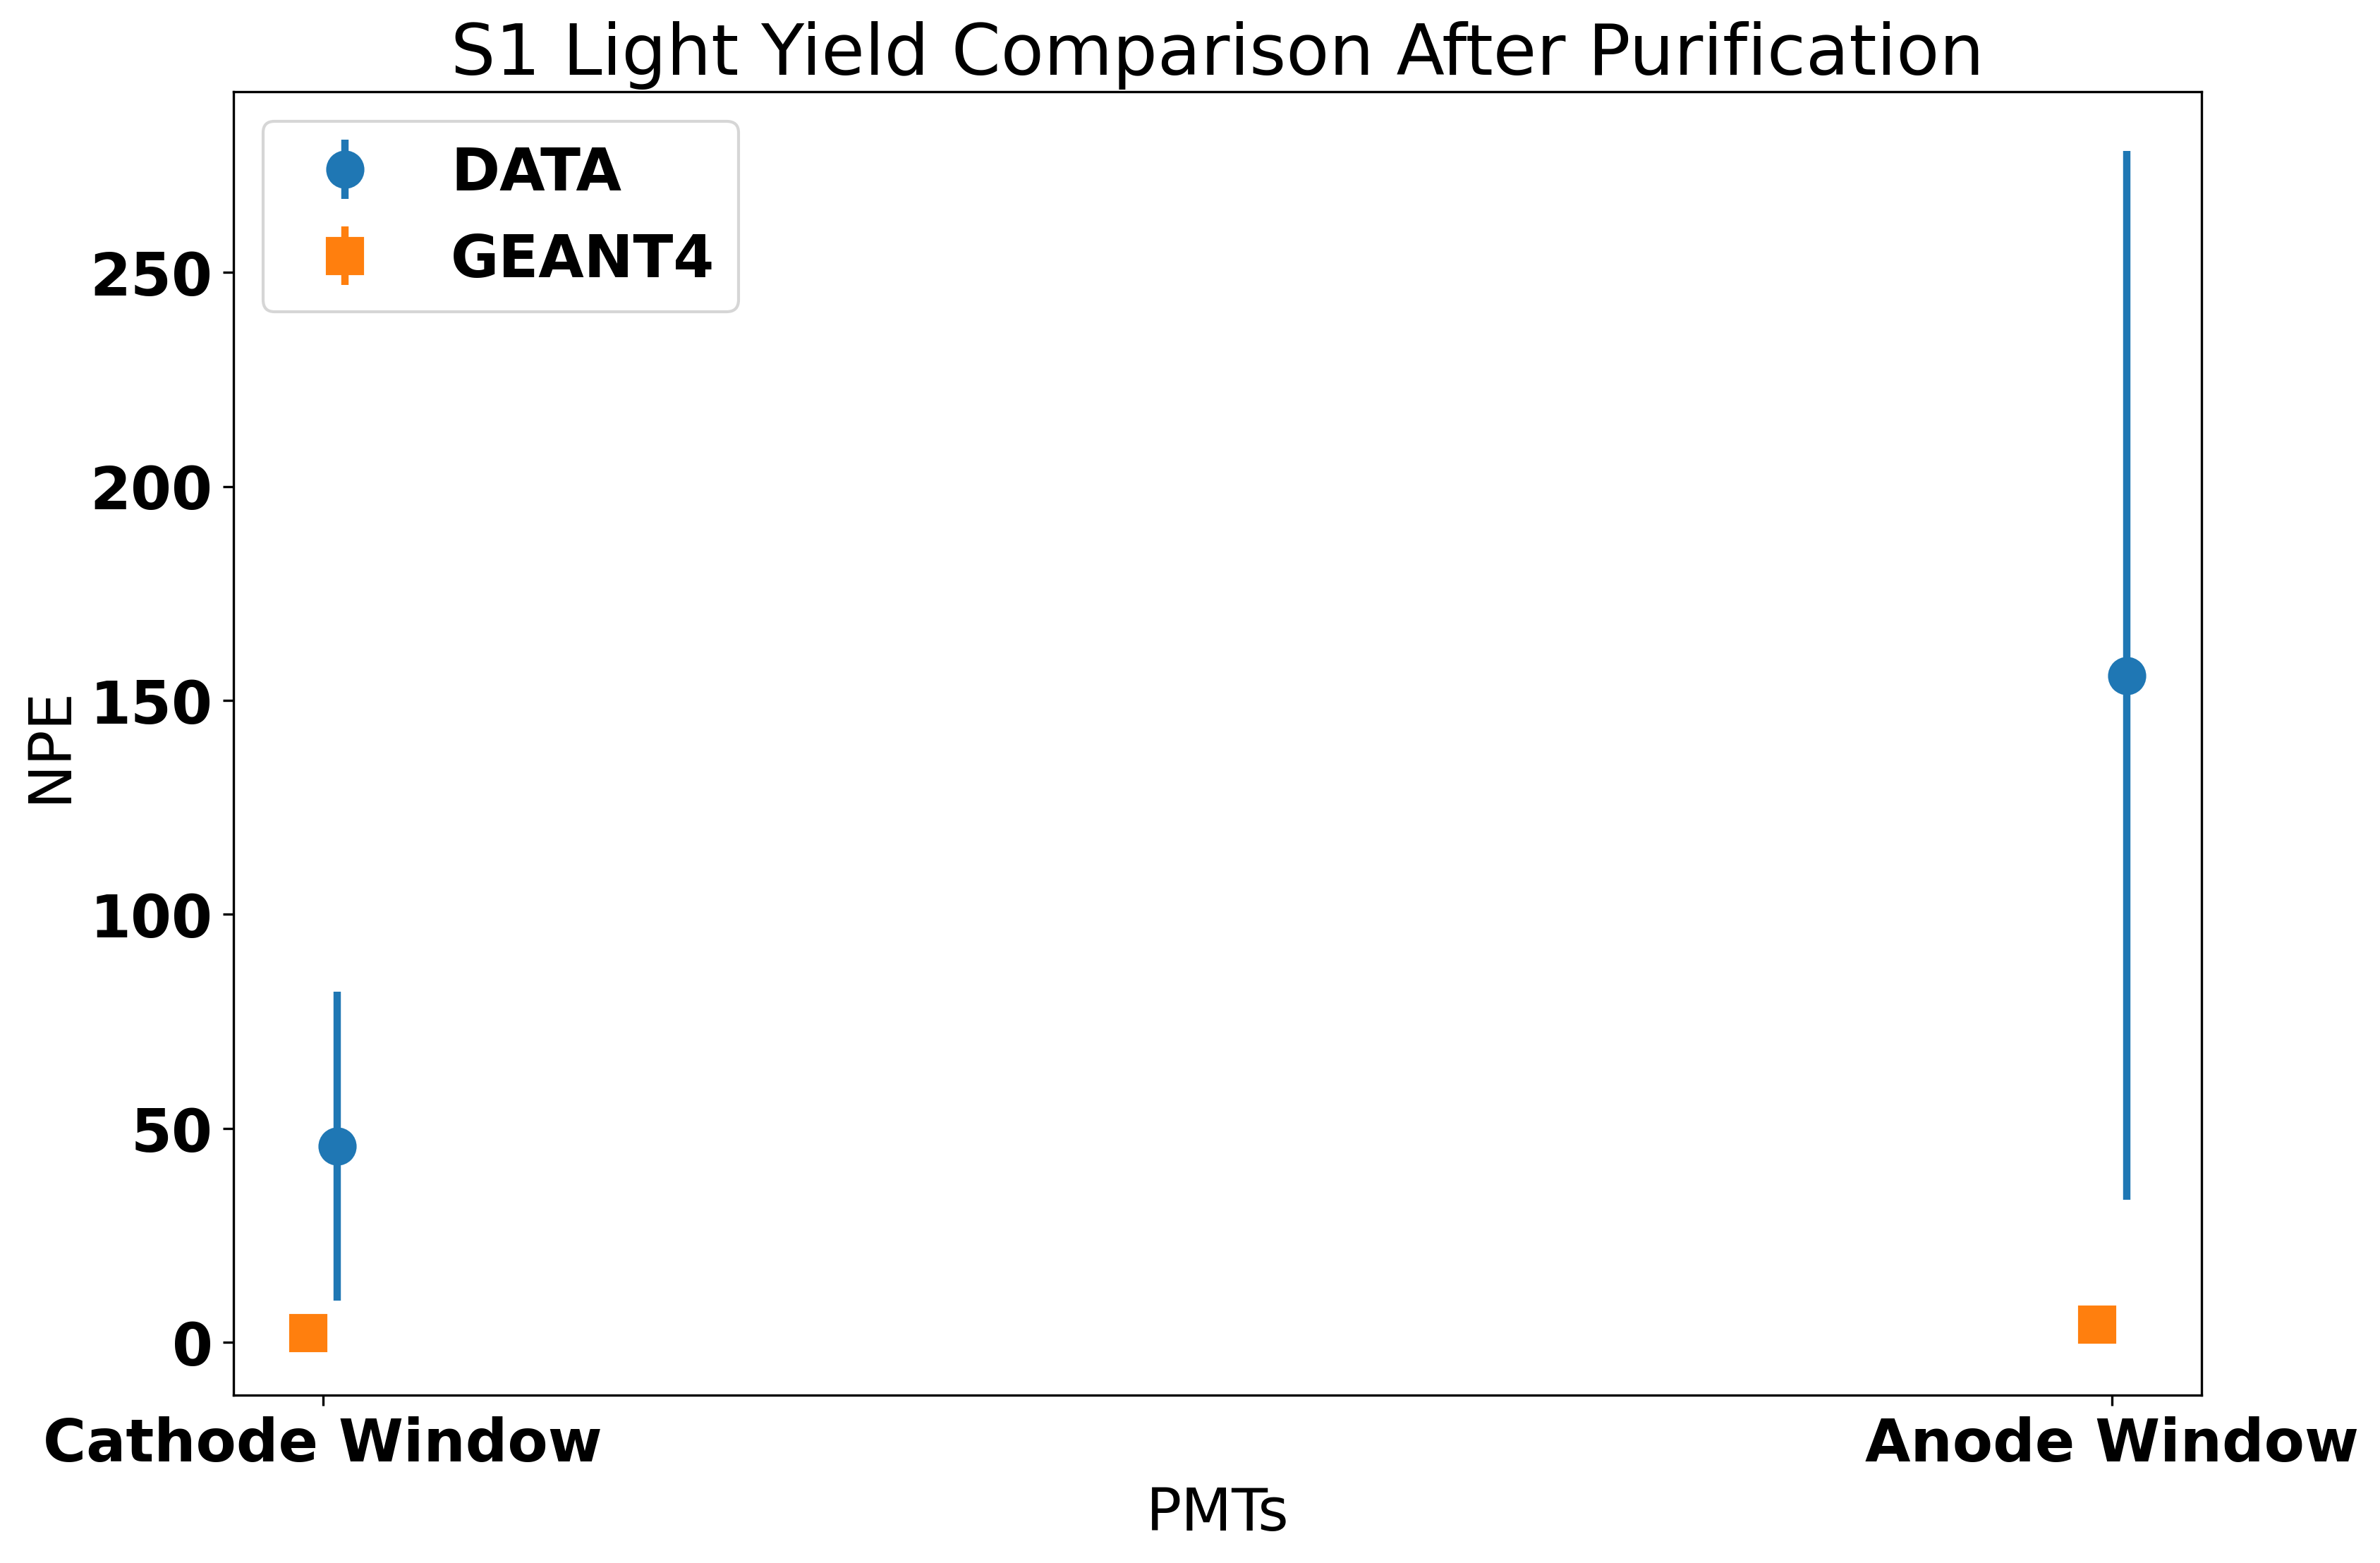

In [60]:
###

#### This scatter plot compares cathode and anode signals ###
x=["Cathode Window","Anode Window"]

fig=plt.figure(figsize=(12,8),dpi=300)

plt.title("S1 Light Yield Comparison After Purification")
plt.ylabel("NPE")
plt.xlabel("PMTs")


offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

## Data
ydata=[np.mean(Day2_PMT3_GainIL),np.mean(Day2_PMT1_GainIL)]
ydataerr=[np.std(Day2_PMT3_GainIL),np.std(Day2_PMT1_GainIL)]
plt.errorbar(x,ydata,ydataerr,fmt='o',label="DATA",transform=trans+offset(+5),markersize=12,elinewidth=2.5)

## Sim
ysim=[S1PMT3,S1PMT1]
ysimerr=[S1PMT3_std,S1PMT1_std]

plt.errorbar(x,ysim,ysimerr,fmt='s',alpha=1,label="GEANT4",transform=trans+offset(-5),markersize=12,elinewidth=2.5)

## SolidAngle sim
ysolid=[np.mean(SolidAnglePMT3),np.mean(SolidAnglePMT1)]
ysoliderr=[np.std(SolidAnglePMT3),np.std(SolidAnglePMT1)]

#plt.errorbar(x,ysolid,ysoliderr,fmt='v',alpha=0.5,label="Solid Angle",transform=trans+offset(+15))
plt.legend(loc='upper left')
plt.savefig("/media/ilker/Ilker/CRAB/Pictures/S1_Scatter_AfterPurifcation.png")
plt.show()
